# Load Data

In [34]:
import pandas as pd
from sklearn.datasets import load_iris, load_wine

# Load Iris Dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Load Wine Dataset
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target


# Evaluation Metrics

In [35]:
from sklearn.metrics import (rand_score, adjusted_rand_score,
                             mutual_info_score, adjusted_mutual_info_score,
                             normalized_mutual_info_score, silhouette_score,
                             calinski_harabasz_score, davies_bouldin_score)

def evaluate_clustering(X, true_labels, predicted_labels):
    return {
        "Rand Index": rand_score(true_labels, predicted_labels),
        "Adjusted Rand Index": adjusted_rand_score(true_labels, predicted_labels),
        "Mutual Information": mutual_info_score(true_labels, predicted_labels),
        "Adjusted Mutual Information": adjusted_mutual_info_score(true_labels, predicted_labels),
        "Normalized Mutual Information": normalized_mutual_info_score(true_labels, predicted_labels),
        "Silhouette Coefficient": silhouette_score(X, predicted_labels) if len(set(predicted_labels)) > 1 else -1,
        "Calinski-Harabasz Index": calinski_harabasz_score(X, predicted_labels),
        "Davies-Bouldin Index": davies_bouldin_score(X, predicted_labels),
    }


# Cohesion and Session

In [36]:
# Function to compute SSE (Sum of Squared Errors)
def compute_sse(X, labels):
    unique_labels = np.unique(labels)
    sse = 0
    for label in unique_labels:
        if label == -1:  # Skip noise points
            continue
        cluster_points = X[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        sse += np.sum((cluster_points - centroid) ** 2)
    return sse


# Function to compute SSB (Sum of Squares Between groups)
def compute_ssb(X, labels):
    overall_mean = np.mean(X, axis=0)
    unique_labels = np.unique(labels)
    ssb = 0
    for label in unique_labels:
        if label == -1:  # Skip noise points
            continue
        cluster_points = X[labels == label]
        cluster_mean = np.mean(cluster_points, axis=0)
        ssb += len(cluster_points) * np.sum((cluster_mean - overall_mean) ** 2)
    return ssb


# Cluster Visualization


In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

def visualize_clusters(X, labels, model_name):
    plt.figure(figsize=(8, 6))

    # Convert data to 2D if it's higher dimensional using PCA
    if X.shape[1] > 2:
        pca = PCA(n_components=2)
        X = pca.fit_transform(X)


    # Unique labels for the clusters
    unique_labels = np.unique(labels)

    # Scatter plot for each cluster
    for label in unique_labels:
        cluster_points = X[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=50)

    plt.title(f"{model_name} Clusters")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Elbow Method
Elbow Method is a technique that we use to determine the number of centroids(k) to use in a k-means clustering algorithm.  
In this method to determine the k-value:
- we continuously iterate for k=1 to k=n (Here n is the hyperparameter that we choose as per our requirement).
- For every value of k, we calculate the within-cluster sum of squares (WCSS) val1ue.


Now For determining the best number of clusters(k) we plot a graph of k versus their WCSS value.
- When k=1 the WCSS has the highest value but with increasing k value WCSS value starts to decrease.
- We choose that value of k from where the graph starts to look like a straight line.

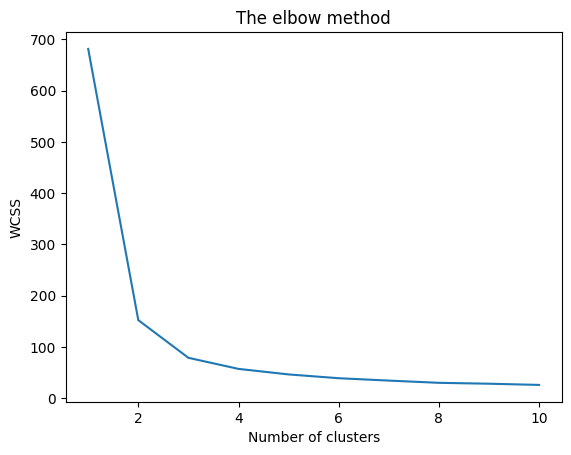

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris.data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Clustering and Evaluating

In [39]:
pip install scikit-learn-extra

## Bisecting Means


In [40]:
# Bisecting KMeans class
class BisectingKMeans:
    def __init__(self, n_clusters=3, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state

    def fit(self, X):
        clusters = [X]
        while len(clusters) < self.n_clusters:
            largest_cluster_idx = np.argmax([len(c) for c in clusters])
            largest_cluster = clusters.pop(largest_cluster_idx)
            kmeans = KMeans(n_clusters=2, random_state=self.random_state)
            labels = kmeans.fit_predict(largest_cluster)
            clusters.append(largest_cluster[labels == 0])
            clusters.append(largest_cluster[labels == 1])
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        label_idx = 0
        for i, cluster in enumerate(clusters):
            self.labels_[label_idx:label_idx + len(cluster)] = i
            label_idx += len(cluster)
        return self


    def fit_predict(self, X, y=None):
        # Fit the model
        self.fit(X)
        # Return the labels after fitting
        return self.labels_

## Clustering Methods

In [41]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn_extra.cluster import KMedoids

# Clustering models
clustering_models = {
    'KMeans': KMeans(n_clusters=3, init='random', random_state=42),
    'KMeans++': KMeans(n_clusters=3, init='k-means++', random_state=42),
    'KMedoids': KMedoids(n_clusters=3, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, algorithm="auto", metric = 'euclidean'),
    'OPTICS': OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1),
    'BisectingKMeans': BisectingKMeans(n_clusters=3, random_state=42)
}

## Iris Dataset

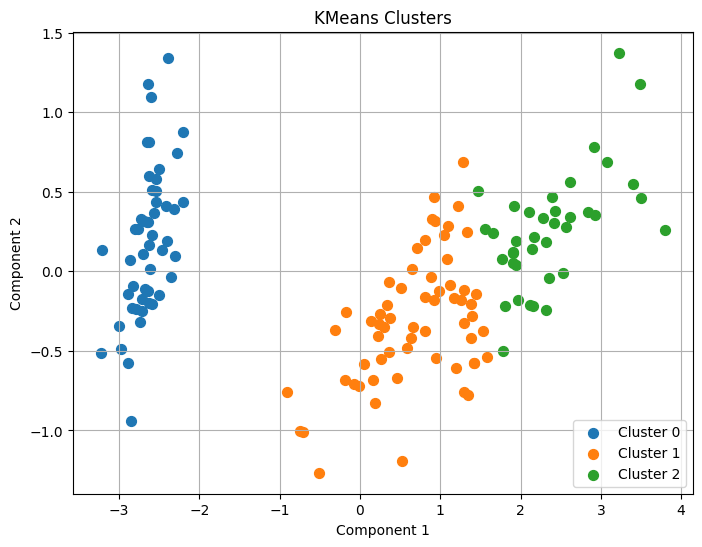

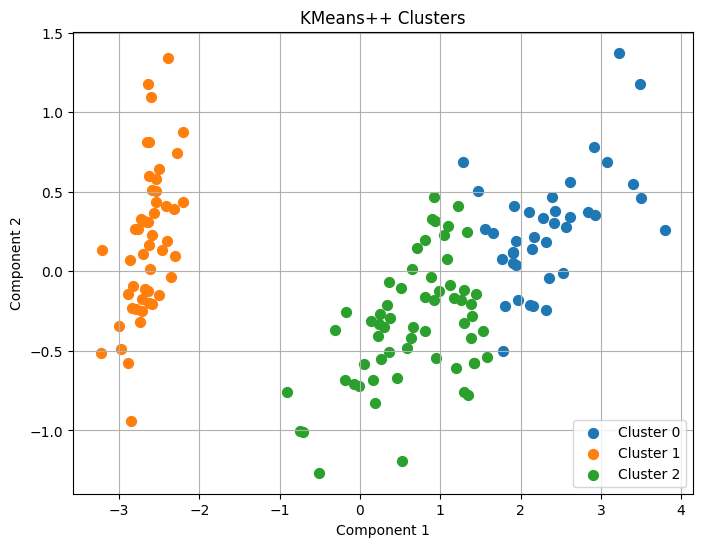

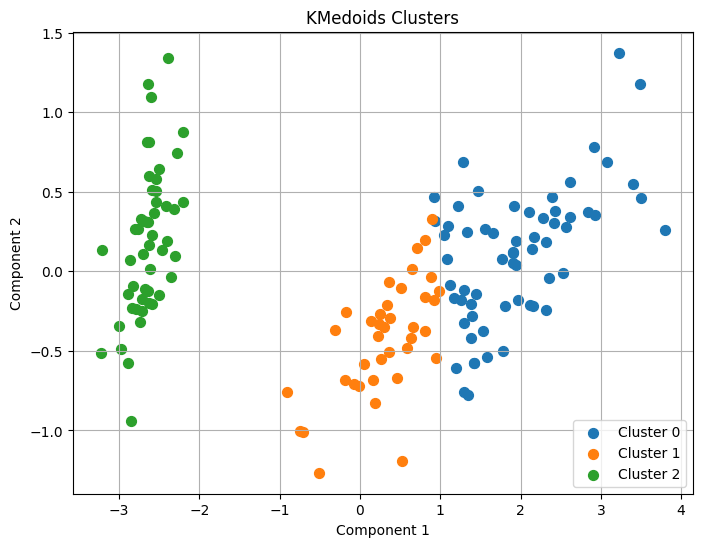

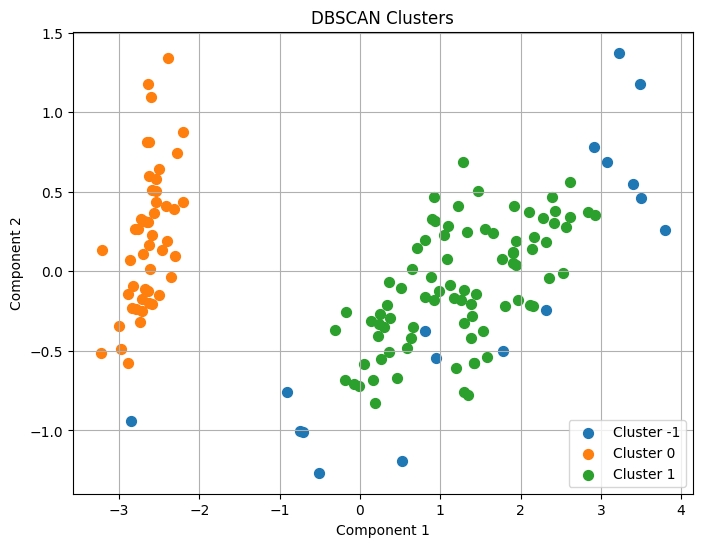

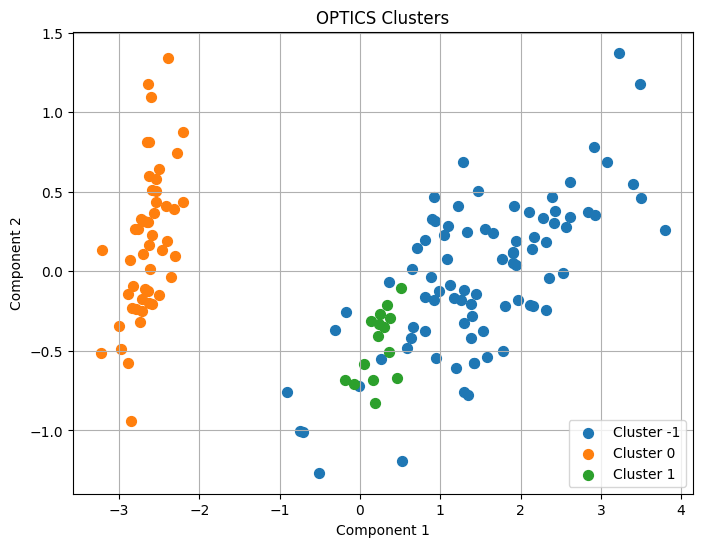

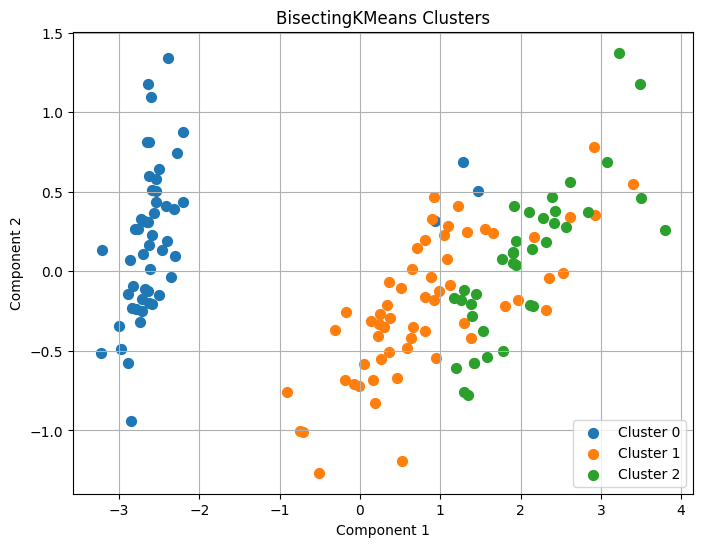

,Rand Index,Adjusted Rand Index,Mutual Information,Adjusted Mutual Information,Normalized Mutual Information,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index,SSE,SSB
KMeans,0.879732,0.730238,0.825591,0.755119,0.758176,0.552819,561.627757,0.661972,78.851441,602.519159
KMeans++,0.873736,0.716342,0.809039,0.738655,0.741912,0.551192,561.593732,0.666039,78.855666,602.514934
KMedoids,0.892260,0.758338,0.855525,0.782956,0.785665,0.520198,521.560907,0.668624,84.160694,597.209906
DBSCAN,0.771902,0.520619,0.615164,0.598995,0.604416,0.486034,220.297515,7.222448,90.747109,475.869426
OPTICS,0.796421,0.574940,0.714699,0.704654,0.708699,0.360976,308.594119,0.761693,16.859000,355.055807
BisectingKMeans,0.876242,0.722315,0.812693,0.743075,0.746281,0.372121,239.998034,1.083529,159.748176,521.622424


In [42]:
iris_results = {}

for model_name, model in clustering_models.items():
    labels_pred = model.fit_predict(iris.data)  # Get predicted labels

    # Compute metrics like Rand index, mutual information, etc.
    metrics = evaluate_clustering(iris.data, iris.target, labels_pred)

    # Compute SSE and SSB
    sse = compute_sse(iris.data, labels_pred)
    ssb = compute_ssb(iris.data, labels_pred)

    # Add SSE and SSB to the metrics
    metrics['SSE'] = sse
    metrics['SSB'] = ssb

    # Store metrics for this model
    iris_results[model_name] = metrics

    # Visualize the clusters
    visualize_clusters(iris.data, labels_pred, model_name)

# Convert the results into a DataFrame for easier comparison
iris_results_df = pd.DataFrame(iris_results).T  # Transpose for better readability
iris_results_df


### Dendrogram

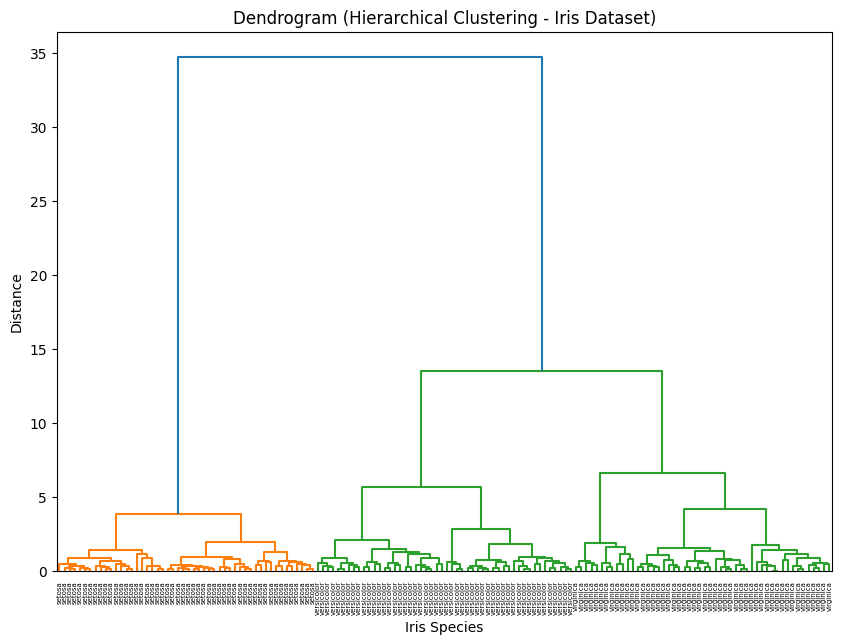

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(iris_df, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=iris.target_names[iris.target])
plt.title('Dendrogram (Hierarchical Clustering - Iris Dataset)')
plt.xlabel('Iris Species')
plt.ylabel('Distance')
plt.show()

## Wine Dataset

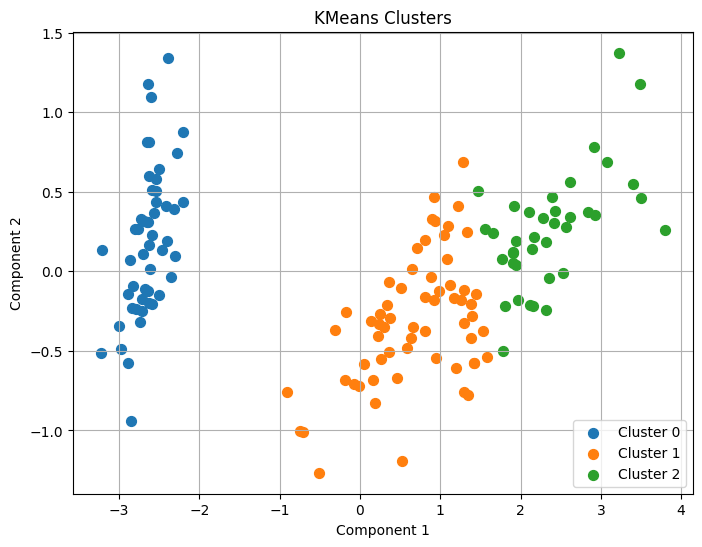

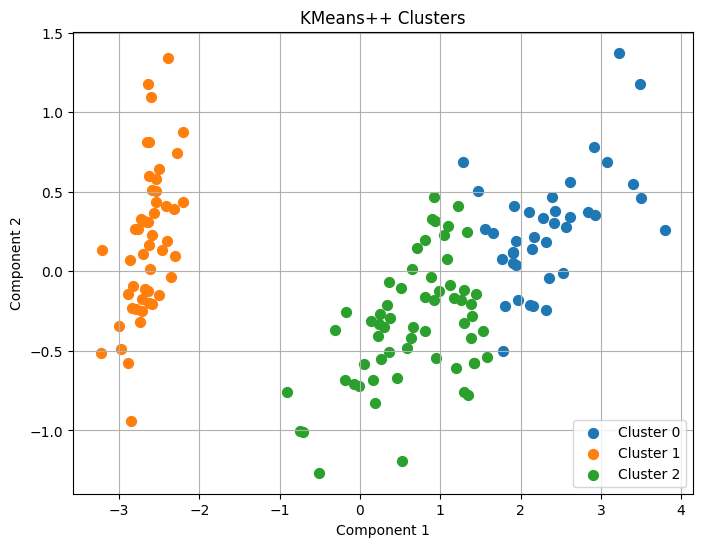

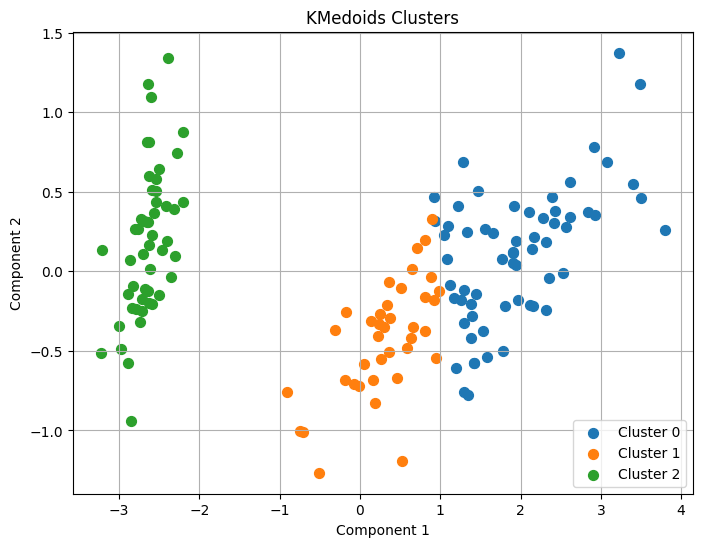

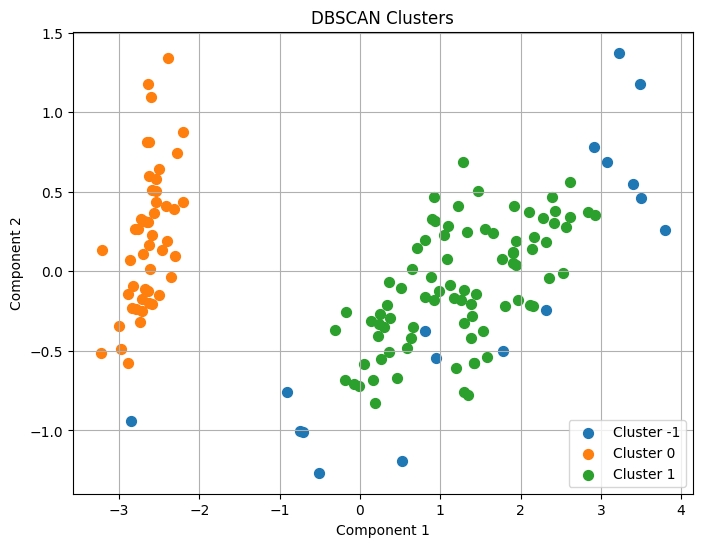

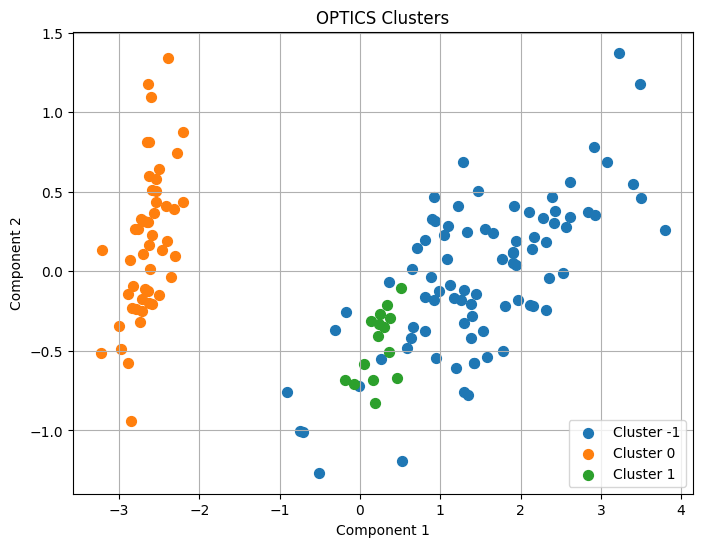

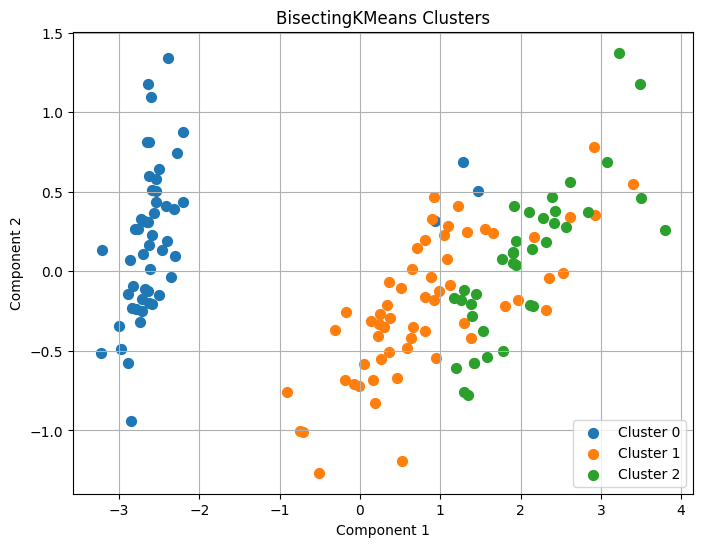

,Rand Index,Adjusted Rand Index,Mutual Information,Adjusted Mutual Information,Normalized Mutual Information,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index,SSE,SSB
KMeans,0.879732,0.730238,0.825591,0.755119,0.758176,0.552819,561.627757,0.661972,78.851441,602.519159
KMeans++,0.873736,0.716342,0.809039,0.738655,0.741912,0.551192,561.593732,0.666039,78.855666,602.514934
KMedoids,0.892260,0.758338,0.855525,0.782956,0.785665,0.520198,521.560907,0.668624,84.160694,597.209906
DBSCAN,0.771902,0.520619,0.615164,0.598995,0.604416,0.486034,220.297515,7.222448,90.747109,475.869426
OPTICS,0.796421,0.574940,0.714699,0.704654,0.708699,0.360976,308.594119,0.761693,16.859000,355.055807
BisectingKMeans,0.876242,0.722315,0.812693,0.743075,0.746281,0.372121,239.998034,1.083529,159.748176,521.622424


In [44]:
iris_results = {}

for model_name, model in clustering_models.items():
    labels_pred = model.fit_predict(iris.data)  # Get predicted labels

    # Compute metrics like Rand index, mutual information, etc.
    metrics = evaluate_clustering(iris.data, iris.target, labels_pred)

    # Compute SSE and SSB
    sse = compute_sse(iris.data, labels_pred)
    ssb = compute_ssb(iris.data, labels_pred)

    # Add SSE and SSB to the metrics
    metrics['SSE'] = sse
    metrics['SSB'] = ssb

    # Store metrics for this model
    iris_results[model_name] = metrics

    # Visualize the clusters
    visualize_clusters(iris.data, labels_pred, model_name)

# Convert the results into a DataFrame for easier comparison
iris_results_df = pd.DataFrame(iris_results).T  # Transpose for better readability
iris_results_df

### Dendrogram

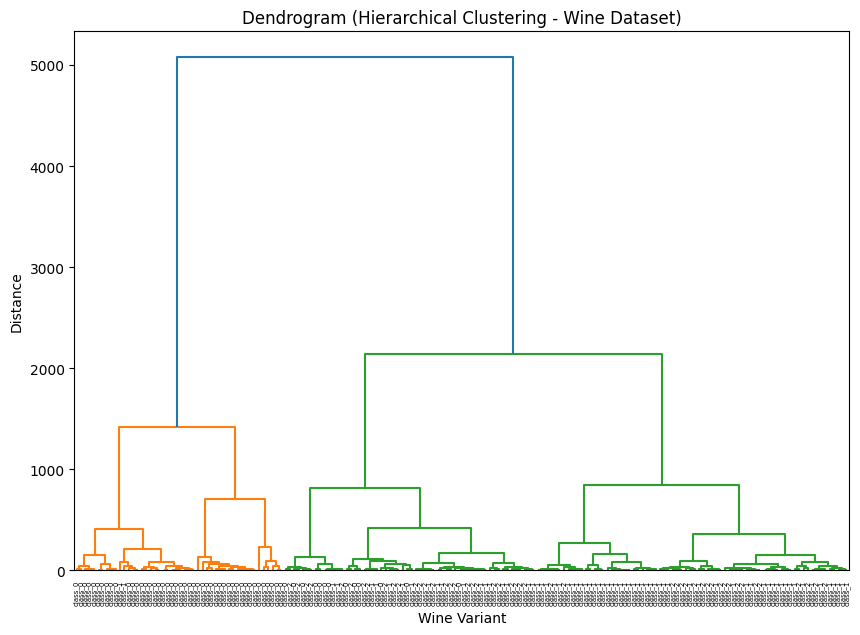

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linked = linkage(wine_df, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=wine.target_names[wine.target])
plt.title('Dendrogram (Hierarchical Clustering - Wine Dataset)')
plt.xlabel('Wine Variant')
plt.ylabel('Distance')
plt.show()

# Conclusion

From the results, we observed:
- **K-Means** and **K-Medoids** generally performed well across both datasets, offering good cohesion and separation.
- **DBSCAN** and **OPTICS**, which are density-based algorithms, struggled to form distinct clusters in some cases, especially when there were noise points, as seen in the need to exclude noise-labeled points.
- The trade-off between **Cohesion (SSE)** and **Separation (SSB)** reflects the effectiveness of each algorithm in balancing intra-cluster similarity and inter-cluster dissimilarity.